# 数据清洗

##空值和缺失值的处理

In [2]:
from pandas import DataFrame,Series
import pandas as pd
import numpy as np
from numpy import NaN

In [3]:
series_obj = Series([1,NaN,NaN])
series_obj.isnull()

0    False
1     True
2     True
dtype: bool

In [4]:
pd.isnull(series_obj)

0    False
1     True
2     True
dtype: bool

In [5]:
demo_arr = np.array([[None,'b','c'],['d',None,'f']])
df_obj = pd.DataFrame(demo_arr)
df_obj

,0,1,2
0,None,b,c
1,d,None,f


In [6]:
df_obj.isnull()

,0,1,2
0,True,False,False
1,False,True,False


In [7]:
df_obj.isnull().sum()

0    1
1    1
2    0
dtype: int64

In [8]:
series_obj.isnull().sum()

2

In [9]:
df_obj.notnull()

,0,1,2
0,False,True,True
1,True,False,True


In [10]:
df_obj.notnull().sum()

0    1
1    1
2    2
dtype: int64

In [11]:
df_obj2 = pd.DataFrame({"类别":['小说','散文随笔','青春文学','传记'],
                        "书名":[np.nan,'《皮囊》','《路程结束时》','《老舍自传》'],
                        "作者":['老舍',None,'张齐鑫','老舍']})

In [12]:
df_obj2

,类别,书名,作者
0,小说,NaN,老舍
1,散文随笔,《皮囊》,None
2,青春文学,《路程结束时》,张齐鑫
3,传记,《老舍自传》,老舍


In [13]:
df_obj2.dropna()

,类别,书名,作者
2,青春文学,《路程结束时》,张齐鑫
3,传记,《老舍自传》,老舍


In [14]:
df_obj2

,类别,书名,作者
0,小说,NaN,老舍
1,散文随笔,《皮囊》,None
2,青春文学,《路程结束时》,张齐鑫
3,传记,《老舍自传》,老舍


In [15]:
df_obj2.dropna(thresh = 2,inplace = True)

In [16]:
df_obj2

,类别,书名,作者
0,小说,NaN,老舍
1,散文随笔,《皮囊》,None
2,青春文学,《路程结束时》,张齐鑫
3,传记,《老舍自传》,老舍


In [17]:
df_obj3 = pd.DataFrame([[1.0,NaN,'a',NaN],[2.0,4.0,7,2.0],[3.0,NaN,8,3.0],[NaN,6.0,9,NaN]],columns = ['A','B','C','D'])
df_obj3

,A,B,C,D
0,1.0,NaN,a,NaN
1,2.0,4.0,7,2.0
2,3.0,NaN,8,3.0
3,NaN,6.0,9,NaN


In [18]:
df_obj3.fillna(value = 66.0)

,A,B,C,D
0,1.0,66.0,a,66.0
1,2.0,4.0,7,2.0
2,3.0,66.0,8,3.0
3,66.0,6.0,9,66.0


In [19]:
df_obj3

,A,B,C,D
0,1.0,NaN,a,NaN
1,2.0,4.0,7,2.0
2,3.0,NaN,8,3.0
3,NaN,6.0,9,NaN


In [20]:
df_obj3.fillna(method = 'ffill',limit = 1)

,A,B,C,D
0,1.0,NaN,a,NaN
1,2.0,4.0,7,2.0
2,3.0,4.0,8,3.0
3,3.0,6.0,9,3.0


In [21]:
df_obj3.fillna({'A':5.0,'B':3.0})

,A,B,C,D
0,1.0,3.0,a,NaN
1,2.0,4.0,7,2.0
2,3.0,3.0,8,3.0
3,5.0,6.0,9,NaN


##重复值的处理

In [22]:
person_info = pd.DataFrame([[1,'小铭',18,180,'女'],[2,'小月月',18,180,'女'],[3,'彭艳',25,185,'男'],[4,'刘华',58,175,'男'],[4,'刘华',58,175,'男'],[5,'周华',36,178,'男']],columns = ['id','name','age','height','gender'])
person_info

,id,name,age,height,gender
0,1,小铭,18,180,女
1,2,小月月,18,180,女
2,3,彭艳,25,185,男
3,4,刘华,58,175,男
4,4,刘华,58,175,男
5,5,周华,36,178,男


In [23]:
person_info.duplicated(keep = 'first')

0    False
1    False
2    False
3    False
4     True
5    False
dtype: bool

In [24]:
person_info.duplicated(subset = 'height',keep = False)

0     True
1     True
2    False
3     True
4     True
5    False
dtype: bool

In [25]:
person_info.drop_duplicates(keep = False)

,id,name,age,height,gender
0,1,小铭,18,180,女
1,2,小月月,18,180,女
2,3,彭艳,25,185,男
5,5,周华,36,178,男


In [26]:
person_info.drop_duplicates(keep = False,ignore_index = True)#版本问题

,id,name,age,height,gender
0,1,小铭,18,180,女
1,2,小月月,18,180,女
2,3,彭艳,25,185,男
3,5,周华,36,178,男


##异常值的处理

In [27]:
def three_sigma(ser1):
    mean_value = ser1.mean()
    std_value = ser1.std()
    rule = (mean_value - 3 * std_value > ser1 | mean_value + 3 * std_value < ser1)
    index = np.arange(ser1.shape[0])[rule]
    return ser1.iloc[index]

In [28]:
df = pd.DataFrame({'A':[1,2,3,4],
                   'B':[2,3,5,2],
                   'C':[1,4,7,4],
                   'D':[1,5,30,3]})
df

,A,B,C,D
0,1,2,1,1
1,2,3,4,5
2,3,5,7,30
3,4,2,4,3


<Axes: >

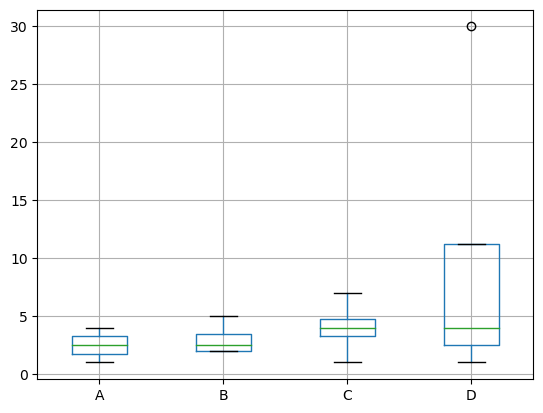

In [29]:
df.boxplot()

In [30]:
df_obj4 = pd.DataFrame({'菜谱名':['红烧肉','铁板鱿鱼','干锅鸭张'],
                        '价格':[29,30,338]})
df_obj4

,菜谱名,价格
0,红烧肉,29
1,铁板鱿鱼,30
2,干锅鸭张,338


In [31]:
df_obj4.replace(to_replace = [30,338],value = [29,29])

,菜谱名,价格
0,红烧肉,29
1,铁板鱿鱼,29
2,干锅鸭张,29


## 更改数据类型

In [32]:
df_2 = pd.DataFrame({'A':[1,2,3,4],
                   'B':[2,3,5,2],
                   'C':[1,4,7,4],
                   'D':[1,5,30,3]})
df_2

,A,B,C,D
0,1,2,1,1
1,2,3,4,5
2,3,5,7,30
3,4,2,4,3


In [33]:
df_2.dtypes

A    int64
B    int64
C    int64
D    int64
dtype: object

In [34]:
df_2['B'].astype(dtype = 'float')

0    2.0
1    3.0
2    5.0
3    2.0
Name: B, dtype: float64

In [35]:
ser_obj= pd.Series(['1','1.2','4.2'])
pd.to_numeric(ser_obj)

0    1.0
1    1.2
2    4.2
dtype: float64

## 数据合并

### 轴向堆叠数据

In [36]:
df1 = pd.DataFrame({'A':['A0','A0','A1'],
                    'B':['B0','B0','B1']})
df1

,A,B
0,A0,B0
1,A0,B0
2,A1,B1


In [37]:
df2 = pd.DataFrame({'C':['C0','C0','C1','C3'],
                    'D':['D0','D2','D2','D3']})
df2

,C,D
0,C0,D0
1,C0,D2
2,C1,D2
3,C3,D3


In [38]:
pd.concat([df1,df2],join = 'outer',axis = 1)

,A,B,C,D
0,A0,B0,C0,D0
1,A0,B0,C0,D2
2,A1,B1,C1,D2
3,NaN,NaN,C3,D3


In [39]:
pd.concat([df1,df2],join = 'outer',axis = 0)

,A,B,C,D
0,A0,B0,NaN,NaN
1,A0,B0,NaN,NaN
2,A1,B1,NaN,NaN
0,NaN,NaN,C0,D0
1,NaN,NaN,C0,D2
2,NaN,NaN,C1,D2
3,NaN,NaN,C3,D3


In [40]:
pd.concat([df1,df2],join = 'inner',axis = 0)

""
0
1
2
0
1
2
3


In [41]:
pd.concat([df1,df2],join = 'inner',axis = 0,ignore_index = True)

""
0
1
2
3
4
5
6


In [42]:
pd.concat([df1,df2],join = 'inner',axis = 1)

,A,B,C,D
0,A0,B0,C0,D0
1,A0,B0,C0,D2
2,A1,B1,C1,D2


### 主键合并数据

In [43]:
left = pd.DataFrame({'key':['K0','K1','K2'],
                     'A':['A0','A1','A2'],
                     'B':['B0','B1','B2']})
left

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2


In [44]:
right = pd.DataFrame({'key':['K0','K1','K2','K3'],
                    'C':['C0','C1','C2','C3'],
                     'D':['D0','D1','D2','D3']})
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [45]:
pd.merge(left,right,how = 'left')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2


In [46]:
pd.merge(left,right,how = 'right')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,NaN,NaN,C3,D3


In [47]:
pd.merge(left,right,how = 'outer')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,NaN,NaN,C3,D3


In [48]:
pd.merge(left,right,how = 'inner')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2


In [49]:
pd.merge(left,right,how = 'cross')

,key_x,A,B,key_y,C,D
0,K0,A0,B0,K0,C0,D0
1,K0,A0,B0,K1,C1,D1
2,K0,A0,B0,K2,C2,D2
3,K0,A0,B0,K3,C3,D3
4,K1,A1,B1,K0,C0,D0
5,K1,A1,B1,K1,C1,D1
6,K1,A1,B1,K2,C2,D2
7,K1,A1,B1,K3,C3,D3
8,K2,A2,B2,K0,C0,D0
9,K2,A2,B2,K1,C1,D1


In [50]:
pd.merge(left,right, on = 'key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2


In [51]:
left2 = pd.DataFrame({'key':['K0','K1','K2'],
                     'A':['A0','A1','A2'],
                     'B':['B0','B1','B2']})
left2

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2


In [52]:
right2 = pd.DataFrame({'key':['K0','K1','K2','K3'],
                      'B':['B0','B1','B2','B5'],
                    'C':['C0','C1','C2','C3'],
                     'D':['D0','D1','D2','D3']})
right2

,key,B,C,D
0,K0,B0,C0,D0
1,K1,B1,C1,D1
2,K2,B2,C2,D2
3,K3,B5,C3,D3


In [53]:
pd.merge(left2,right2,on = 'B')

,key_x,A,B,key_y,C,D
0,K0,A0,B0,K0,C0,D0
1,K1,A1,B1,K1,C1,D1
2,K2,A2,B2,K2,C2,D2


In [54]:
pd.merge(left2,right2,on = ['key','B'])

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2


In [55]:
left3 = pd.DataFrame({
                     'A':['A0','A1','A2'],
                     'B':['B0','B1','B2']})
left3

,A,B
0,A0,B0
1,A1,B1
2,A2,B2


In [56]:
right3 = pd.DataFrame({
                     'C':['C0','C1','C2'],
                     'D':['D0','D1','D2']})
right3

,C,D
0,C0,D0
1,C1,D1
2,C2,D2


In [57]:
pd.merge(left3,right3,left_index = True,right_index = True)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2


### 根据行索引合并数据

In [58]:
left4 = pd.DataFrame({
                     'A':['A0','A1'],
                     'B':['B0','B1']})
left4

,A,B
0,A0,B0
1,A1,B1


In [59]:
right4 = pd.DataFrame({
                     'C':['C0','C1'],
                     'D':['D0','D1']})
right4

,C,D
0,C0,D0
1,C1,D1


In [60]:
left4.join(right4)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1


In [64]:
left4.join(right4,how = 'outer')

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1


In [65]:
left5 = pd.DataFrame({'key':['K0','K1','K2'],
                     'A':['A0','A1','A2'],
                     'B':['B0','B1','B2']})
left5

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2


In [67]:
right5 = pd.DataFrame({
                    'C':['C0','C1','C2'],
                     'D':['D0','D1','D2']},index = ['K0','K1','K2'])
right5

,C,D
K0,C0,D0
K1,C1,D1
K2,C2,D2


In [73]:
left5.join(right5,how = 'outer')

,key,A,B,C,D
0,K0,A0,B0,NaN,NaN
1,K1,A1,B1,NaN,NaN
2,K2,A2,B2,NaN,NaN
K0,NaN,NaN,NaN,C0,D0
K1,NaN,NaN,NaN,C1,D1
K2,NaN,NaN,NaN,C2,D2


In [75]:
left5.join(right5,how = 'inner')

,key,A,B,C,D


In [76]:
left5.join(right5,how = 'right')

,key,A,B,C,D
K0,NaN,NaN,NaN,C0,D0
K1,NaN,NaN,NaN,C1,D1
K2,NaN,NaN,NaN,C2,D2


In [77]:
left5.join(right5,how = 'left')

,key,A,B,C,D
0,K0,A0,B0,NaN,NaN
1,K1,A1,B1,NaN,NaN
2,K2,A2,B2,NaN,NaN


In [78]:
left5.join(right5,how = 'left',on = 'key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2


In [83]:
left5.join(right5,how = 'outer',on = 'key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2


In [85]:
left6 = pd.DataFrame({'key':['K0','K1','K2'],
                     'A':['A0','A1','A2'],
                     'B':['B0','B1','B2']})
left6

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2


In [88]:
right6 = pd.DataFrame({'key':['K0','K1','K2'],
                    'C':['C0','C1','C2'],
                     'D':['D0','D1','D2']},index = [0,1,3])
right6

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
3,K2,C2,D2


In [91]:
left6.join(right6,how = 'left',lsuffix = '_x',rsuffix = '_y',sort = True)

,key_x,A,B,key_y,C,D
0,K0,A0,B0,K0,C0,D0
1,K1,A1,B1,K1,C1,D1
2,K2,A2,B2,NaN,NaN,NaN


### 合并重叠数据

In [98]:
left7 = pd.DataFrame({'key':['K0','K1','K2','K3'],
                     'A':[np.nan,'A0','A1','A2'],
                     'B':[np.nan,'B1',np.nan,'B3']})
left7

,key,A,B
0,K0,NaN,NaN
1,K1,A0,B1
2,K2,A1,NaN
3,K3,A2,B3


In [99]:
right7 = pd.DataFrame({'A':['C0','C1','C2'],
                       'B':['D0','D1','D2']})
right7

,A,B
0,C0,D0
1,C1,D1
2,C2,D2


In [100]:
left7.combine_first(right7)

,A,B,key
0,C0,D0,K0
1,A0,B1,K1
2,A1,D2,K2
3,A2,B3,K3


In [101]:
left7.combine_first(right7)

,A,B,key
0,C0,D0,K0
1,A0,B1,K1
2,A1,D2,K2
3,A2,B3,K3
